In [1]:
import nltk
# nltk.download("movie_reviews")
import numpy as np
from nltk.corpus import movie_reviews 
import pandas as pd
from nltk.corpus import twitter_samples 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vritansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vritansh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv("scraped_tweets.csv", )
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,TranyTranshuman,Founder of Fuck It Bucket $FIB https://t.co/JN...,Earth,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,1,bwu,A very social creature with a tendency to isol...,Malaysia,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,2,SajithSwami,Opinions are mine only 🇨🇦 https://t.co/f4soPJ2...,"Toronto, Ontario",364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
3,3,matteyuC,NaN,earth,146,48,69,276,Made a 16 min video report on leveraging ChatG...,[]
4,4,OghamTheBold,Exporter MBE (Monopoly Busting Entrepreneur) H...,@OghamTheBold@mastodon.scot,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']


In [3]:
df.describe()

,Unnamed: 0,following,followers,totaltweets,retweetcount
count,1500.000000,1500.00000,1500.000000,1.500000e+03,1500.000000
mean,749.500000,1351.46800,3366.666667,3.290900e+04,171.651333
std,433.157015,3996.33228,20373.339381,1.409277e+05,887.918824
min,0.000000,0.00000,0.000000,1.000000e+00,0.000000
25%,374.750000,154.75000,56.000000,5.295000e+02,0.000000
50%,749.500000,467.50000,290.500000,3.244000e+03,1.000000
75%,1124.250000,1289.25000,1187.500000,1.806125e+04,36.500000
max,1499.000000,106512.00000,469771.000000,3.021509e+06,10287.000000


In [4]:
df.columns

Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0        0
username          0
description     219
location        522
following         0
followers         0
totaltweets       0
retweetcount      0
text              0
hashtags          0
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0        0
username          0
description     219
location        522
following         0
followers         0
totaltweets       0
retweetcount      0
text              0
hashtags          0
dtype: int64

In [7]:
df

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,TranyTranshuman,Founder of Fuck It Bucket $FIB https://t.co/JN...,Earth,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,1,bwu,A very social creature with a tendency to isol...,Malaysia,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,2,SajithSwami,Opinions are mine only 🇨🇦 https://t.co/f4soPJ2...,"Toronto, Ontario",364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
3,3,matteyuC,NaN,earth,146,48,69,276,Made a 16 min video report on leveraging ChatG...,[]
4,4,OghamTheBold,Exporter MBE (Monopoly Busting Entrepreneur) H...,@OghamTheBold@mastodon.scot,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']
...,...,...,...,...,...,...,...,...,...,...
1495,1495,tomoXtechno,Tinkering w/ Lightning Network. Former OpenBSD...,"Ho Chi Minh City, Vietnam",339,454,997,0,out: piping arbitrary curl output to a root sh...,[]
1496,1496,RottenCase,"i love drawings on paper, yes drawings",NaN,29,8,173,0,@CodeIcant @Sakura_Rabbiter i use chatgpt and ...,[]
1497,1497,slamtron_x,Aspiring wizard/mad scientist.,"Virginia, USA",618,315,578,7,@OpenAI ChatGPT can even program #Cardano Plut...,['Cardano']
1498,1498,tendiesforlunch,Retail-ded investor . mechanical engineer. Pro...,"Miami, FL",655,71,3488,6,Meet our realtime #UE5 powered educational vir...,['UE5']


In [11]:
df.dropna(inplace=True)
df

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,TranyTranshuman,Founder of Fuck It Bucket $FIB https://t.co/JN...,Earth,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,1,bwu,A very social creature with a tendency to isol...,Malaysia,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,2,SajithSwami,Opinions are mine only 🇨🇦 https://t.co/f4soPJ2...,"Toronto, Ontario",364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
4,4,OghamTheBold,Exporter MBE (Monopoly Busting Entrepreneur) H...,@OghamTheBold@mastodon.scot,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']
7,7,welpvandewulp,music in mind,Netherlands,2705,632,16785,3100,@sama ChatGPT is scary good. We are not far fr...,[]
...,...,...,...,...,...,...,...,...,...,...
1492,1492,TonyDarko_eth,Darko Studio Founder II 3D designer & Wearable...,Mexico,1722,910,581,0,#ChatGPT version: I asked it to rewrite and im...,['ChatGPT']
1494,1494,Yazrineshahab,I am not a spy🤨,"Shah Alam, Selangor,Malaysia",1120,476,21673,29,Oh hell yes. You can now text ChatGPT’s cousin...,[]
1495,1495,tomoXtechno,Tinkering w/ Lightning Network. Former OpenBSD...,"Ho Chi Minh City, Vietnam",339,454,997,0,out: piping arbitrary curl output to a root sh...,[]
1497,1497,slamtron_x,Aspiring wizard/mad scientist.,"Virginia, USA",618,315,578,7,@OpenAI ChatGPT can even program #Cardano Plut...,['Cardano']


# Preprocessing

In [66]:
# code here
def remove_all_punctuations(data):
    all_punctuations =  list(string.punctuation)
    all_punctuations.append("``")
    lst = []
    for review in data:
        tokenized = word_tokenize(review)
        considered_word = [word for word in tokenized if not word in all_punctuations]
        considered_word = " ".join(considered_word)
        lst.append(considered_word)
    return lst

In [38]:
def remove_hashtags(data):
        data= [review.replace("#", '"') for review in data]
        return data

In [14]:
# code here
def remove_stop_words(data):
    
    stop_words = set(stop)
    lst = []
    for review in data:
        tokenized = word_tokenize(review)
        considered_word = [word for word in tokenized if not word in stop_words]
        considered_word = " ".join(considered_word)
        lst.append(considered_word)
    return lst

In [51]:
def remove_links(data):
    ans = []
    for d in data:
         ans.append(re.sub(r"http\S+", "", d))
    return ans

In [54]:
def clean_html(data):
    ans = []
    for text in data:
        html = re.compile('<.*?>')
        ans.append( html.sub(r'', text) )
    return ans

In [57]:
def remove_non_ascii(data):
    ans =[]
    for s in data:
        ans.append("".join(i for i in s if ord(i)<128))
    return ans

In [63]:
def clean_links(data):
    ans = []
    for text in data:
        txt = re.compile('http(s)?://\w+(\.\w+){1,}(/\w+)*')
        ans.append(txt.sub(r'', text))
    return ans

In [85]:
def clean_links_a1(data):
    ans = []
    for text in data:
        txt = re.compile(r'//t.co/[a-zA-Z0-9_]*')
        print(txt.sub('',text))
        ans.append(txt.sub(r'',text))
    return ans

In [86]:
x = ['ercwl Yo Eric guess one two poems written ChatGPT instead //t.co/oUffuqhQpE']
clean_links_a1(x)


ercwl Yo Eric guess one two poems written ChatGPT instead 


['ercwl Yo Eric guess one two poems written ChatGPT instead ']

In [15]:
drop_columns = ['username', 'Unnamed: 0']
data = df.drop(columns= drop_columns)

In [16]:
data.head()

,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,Founder of Fuck It Bucket $FIB https://t.co/JN...,Earth,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,A very social creature with a tendency to isol...,Malaysia,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,Opinions are mine only 🇨🇦 https://t.co/f4soPJ2...,"Toronto, Ontario",364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
4,Exporter MBE (Monopoly Busting Entrepreneur) H...,@OghamTheBold@mastodon.scot,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']
7,music in mind,Netherlands,2705,632,16785,3100,@sama ChatGPT is scary good. We are not far fr...,[]


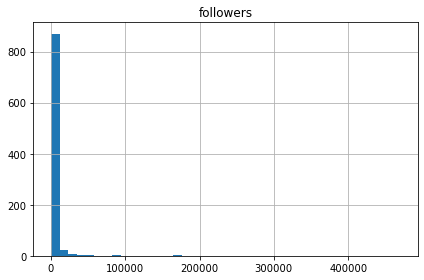

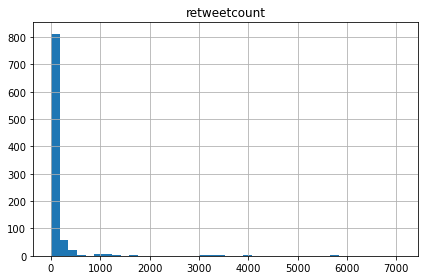

In [17]:
data.hist(column=['followers'],bins=40)
plt.tight_layout()
plt.show()

data.hist(column=['retweetcount'],bins=40)
plt.tight_layout()
plt.show()

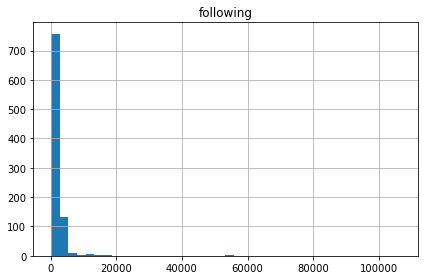

In [18]:
data.hist(column=['following'],bins=40)
plt.tight_layout()
plt.show()

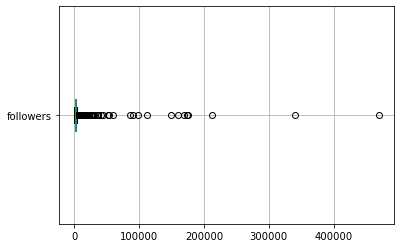

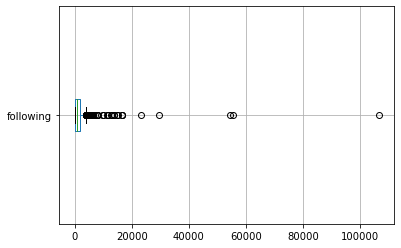

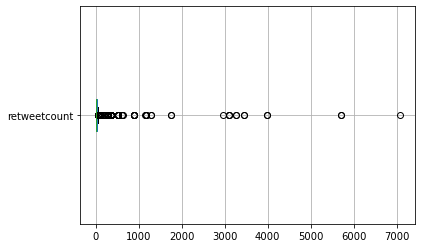

In [19]:
data.boxplot(column=['followers'],vert=False)
plt.show()
data.boxplot(column=['following'],vert=False)
plt.show()
data.boxplot(column=['retweetcount'],vert=False)
plt.show()

In [20]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,TranyTranshuman,Founder of Fuck It Bucket $FIB https://t.co/JN...,Earth,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,1,bwu,A very social creature with a tendency to isol...,Malaysia,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,2,SajithSwami,Opinions are mine only 🇨🇦 https://t.co/f4soPJ2...,"Toronto, Ontario",364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
4,4,OghamTheBold,Exporter MBE (Monopoly Busting Entrepreneur) H...,@OghamTheBold@mastodon.scot,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']
7,7,welpvandewulp,music in mind,Netherlands,2705,632,16785,3100,@sama ChatGPT is scary good. We are not far fr...,[]


In [47]:
X_dev = df['text']

In [87]:
X_dev = remove_hashtags(X_dev)
X_dev = remove_stop_words(X_dev)
X_dev = remove_all_punctuations(X_dev)
X_dev = remove_links(X_dev)
X_dev = remove_non_ascii(X_dev)
X_dev = clean_links(X_dev)
#//t.co/DIID0JGmaX
X_dev = clean_links_a1(X_dev)

ercwl Yo Eric guess one two poems written ChatGPT instead 
Playing around ChatGPT Financial Planning Take look Its fun 
achyutmenon Did mean HR I asked ChatGPT OpenAI question said HR business partner .. I started taking advice AI I would rather take one anytime achyutmenon
I 'll ask ChatGPT 's advantage take oil gas platforms North Sea helpful legal advice catching runaway slaves I scrolled past Blah Blah moralising said first strike nuclear attack always works wonders 
sama ChatGPT scary good We far dangerously strong AI
ChatGPT INSANE
Tricking ChatGpt 
With great deal work I able get chatgpt speculate photonic quantum processors nature space time planck scale processors interesting theoretical physics still cool nonetheless Luminosity-e 
I love ask ChatGPT I crimes says help ask I crimes feed starving children gives step step instructions Even AI falls sob stories 
Spawn ChatGPT try sell things
chatgpt absolutely incredible
Did ArtificialIntelligence Just Get Too Smart 
The tech ind

In [90]:
X_dev = remove_all_punctuations(X_dev)

<function __main__.remove_all_punctuations(data)>